<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-estimation-categorical-regression-(equivalent-of-One-way-ANOVA)" data-toc-modified-id="Bayesian-estimation-categorical-regression-(equivalent-of-One-way-ANOVA)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian estimation categorical regression (equivalent of One-way ANOVA)</a></span></li><li><span><a href="#Bayesian-inference" data-toc-modified-id="Bayesian-inference-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bayesian inference</a></span></li><li><span><a href="#Steps-of-Bayesian-data-analysis" data-toc-modified-id="Steps-of-Bayesian-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Steps of Bayesian data analysis</a></span></li><li><span><a href="#Step-1---Identify-the-relevant-data-for-question-under-investigation" data-toc-modified-id="Step-1---Identify-the-relevant-data-for-question-under-investigation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 1 - Identify the relevant data for question under investigation</a></span><ul class="toc-item"><li><span><a href="#Data-overview-and-study-description" data-toc-modified-id="Data-overview-and-study-description-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data overview and study description</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Import data</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Plotting-histograms-for-the-data-depednent-variable-of--the-number-of-intrusive-thoughts" data-toc-modified-id="Plotting-histograms-for-the-data-depednent-variable-of--the-number-of-intrusive-thoughts-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Plotting histograms for the data depednent variable of  the number of intrusive thoughts</a></span></li></ul></li></ul></li><li><span><a href="#Treament-coding" data-toc-modified-id="Treament-coding-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Treament coding</a></span></li><li><span><a href="#Post-model-fit-visualisations---Bayesian-simple-regression" data-toc-modified-id="Post-model-fit-visualisations---Bayesian-simple-regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Post model fit-visualisations - Bayesian simple regression</a></span><ul class="toc-item"><li><span><a href="#Posterior-distributions-plots" data-toc-modified-id="Posterior-distributions-plots-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Posterior distributions plots</a></span></li><li><span><a href="#Posterior-autocorrelation-plot" data-toc-modified-id="Posterior-autocorrelation-plot-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Posterior autocorrelation plot</a></span></li><li><span><a href="#Posterior-trace-plots" data-toc-modified-id="Posterior-trace-plots-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Posterior trace plots</a></span></li></ul></li><li><span><a href="#Posterior-predcitive-check" data-toc-modified-id="Posterior-predcitive-check-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Posterior predcitive check</a></span></li><li><span><a href="#Reporting-the-results-of-the-Bayesian-categorical-regression" data-toc-modified-id="Reporting-the-results-of-the-Bayesian-categorical-regression-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Reporting the results of the Bayesian categorical regression</a></span><ul class="toc-item"><li><span><a href="#Write-up" data-toc-modified-id="Write-up-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span><font size="3">Write up</font></a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [3]:
# Import relevant packages for data analysis and visualisation.
import stan as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patsy import dmatrix, dmatrices
from patsy.contrasts import Treatment, Sum
import arviz as az
import os

# Importing nest_asyncio is only necessary to run pystan in Jupyter notebooks.
import nest_asyncio
nest_asyncio.apply();

# Specify the number of chains to the number of availible cpu's.
n_chains = os.cpu_count()
n_samples = 2000
#Convert to int so Stan will not crash below.
n_warmup = int(n_samples/2)
#Specify step size.
stepS = .8

In [4]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Bayesian estimation categorical regression (equivalent of One-way ANOVA)

# Bayesian inference
<font size = "3"> Following the quick description of the classic one-way ANOVA as a categorical regression above its important to keep in mind that Bayesian analysis inferences are all derived from the application of Bayes rule $P(\theta \mid y) = \large \frac{P(y \mid \theta) \, P(\theta)}{P(y)}$ and as such while the following description of the Bayesian model is an equivalent to a categorical regression it is fundamentally different, because it uses fully probabilistic modelling and the inferences are not based on sampling distributions</font>
    
<font size = "1"> For a fuller description see the practicing Bayesian statistics markdown file within the Github repository.</font>

# Steps of Bayesian data analysis

<font size = "3"> Kruschke (2015) offers a step by step formulation for how to conduct a Bayesian analysis:

1. Identify the relevant data for the question under investigation.

2. Define the descriptive (mathematical) model for the data.

3. Specify the Priors for the model. If scientific research publication is the goal the priors must be accepted by a skeptical audience. Much of this can be achieved using prior predicitve checks to ascertain if the priors are reasonable.

4. Using Bayes' rule estimate the posterior for the parameters of the model using the likelihood and priors. Then interpret the posterior.

5. Conduct model checks. i.e. Posterior predictive checks.</font> 

<font size = "1">This notebook will follow this approach generally.</font> 

#  Step 1 - Identify the relevant data for  the question under investigation
## Data overview and study description

The data below has been taken from https://drive.google.com/file/d/0Bz-rhZ21ShvORHlaS1VqNlNRT3c/view?resourcekey=0-0nZSa_sasPeQ0o8FHmhsmA, with the orignal dataset being from James et al. (2015).

See orignal paper here https://journals.sagepub.com/doi/pdf/10.1177/0956797615583071?referrer=&priority=true&module=meter-Links&pgtype=Blogs&contentId=&action=click&contentCollection=meter-links-click&version=meter+at+null&mediaId=

An unfortunate reality of trauma is that individuals can experience flasbacks which have been termed "Intrusive memories". A treatment that has been argued to be effective for sufferers of intrusive memories is to use reconsolidation methods. As such, James et al. (2015) wanted to investigate if a video game treament (tetris) could improve suffers experience by reducing their number of intrusive memories.

The participants with the study were split into four conditions (n = 72, with 18 per condition).
in

Conditions
1. No-task control: These participants completed a 10-minute music filler task.
2. Reactivation + Tetris: These participants underwent a reactivation task to (trama film) aimed to reactivate their traumatic memories, which was then followed by 10 minute filler music task. this was followed by playing tetris for 12 minutes.
3. Tetris: These participants played tetris for 12 minutes.
4. Reactivation only: Participants only watch the trauma film.

## Import data

In [5]:
# Set url where study dataset is stored to import into notebook.
url = 'https://raw.githubusercontent.com/ebrlab/Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists/master/wip/Data/James%20et%20al%202015%20Experiment%202%20Data%20Set.csv'

# Generate pandas data frame with the study data.
df = pd.read_csv(url)
df.head(1)

,Condition,Time_of_Day,BDI_II,STAI_T,pre_film_VAS_Sad,pre_film_VAS_Hopeless,pre_film_VAS_Depressed,pre_film_VAS_Fear,pre_film_VAS_Horror,pre_film_VAS_Anxious,...,Day_Zero_Number_of_Intrusions,Days_One_to_Seven_Number_of_Intrusions,Visual_Recognition_Memory_Test,Verbal_Recognition_Memory_Test,Number_of_Provocation_Task_Intrusions,Diary_Compliance,IES_R_Intrusion_subscale,Tetris_Total_Score,Self_Rated_Tetris_Performance,Tetris_Demand_Rating
0,1,2,1,33,0.0,0.0,0.0,0.4,0.3,0.8,...,2,4,15,18,5,9,0.62,9999,9999.0,0


# Exploratory data analysis 
### Plotting histograms for the data depednent variable of  the number of intrusive thoughts

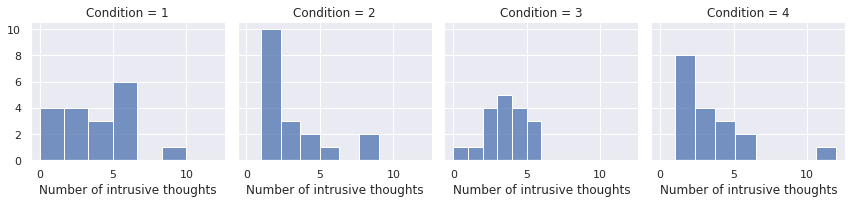

In [6]:
# Set theme of seaborn plots for nicer display.
sns.set()

# Generate grid to display the data for the four separate conditions.
grid = sns.FacetGrid(df, col = "Condition");

# Generate the four histogram plots for the 4 conditions for Day 0
grid.map(sns.histplot, "Day_Zero_Number_of_Intrusions").set(xlabel = 'Number of intrusive thoughts');

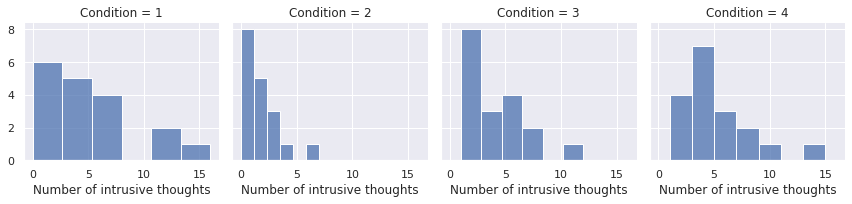

In [7]:
# Generate the four histogram plots for the number of intrusive thoughts across the 4 conditions for Day 7.
grid1 = sns.FacetGrid(df, col="Condition")
grid1.map(sns.histplot,  "Days_One_to_Seven_Number_of_Intrusions").set(xlabel = 'Number of intrusive thoughts');

# Step 2 - Define the descriptive statistical model \begin{align*}
y_i &\sim Normal(\mu_i, \sigma)
\\ \mu_i &= \beta_0 + \beta_k x_k
\\ \beta_0 &\sim Normal(\bar{y}, y_\sigma * 2.5)
\\ \beta_K &\sim Normal(0, 2.5)
\\ \sigma &\sim Exponential(1/y_\sigma)
\end{align*}

Where, $\bar{y} =$ mean$(y)$ and $y_\sigma$ = sd$(y)$

<font size = "3">The formulation for presenting statistical models here follows that used by McElreath (2020) for its intuitive nature. In plain english the model specifies that the dependent variable $y_i$ is distributed normally in terms of the Likelihood with the $\mu_i = \beta_0 + \beta_k x_k$ and $\sigma$ to be estimated. With the prior for the $\beta_0$ parameter being $Normal(\bar{y}, y_\sigma)$ followed by the $\beta_k x_k$ parameters being $Normal(0, 2.5)$ and the $\sigma$ being $Exponential(1/y_\sigma)$.</font>

# Step 3 - Specify the priors

The priors that are used in the following model are the data informed prior defaults that are implemented in the Rstanarm package (Goodrich, Gabry, Ali & Brilleman, 2018). Why use default priors? Because in most of the recent probabilistic programming user friendly packages there are varyious defaults with their own individual statistical reasoning that users should be aware of and that are clearly described by the authors of the packages (Bürkner, 2017; Goodrich, Gabry, Ali & Brilleman, 2018, Westfall, 2017). Additonally, for this model equivalent of a categorical regression, the problem is more with the likelihood than the priors for the dataset analysed. So its a good example to show that whilst reasoned defaults are applicable nothing will overcome appropriate care and detail in terms of model building and model checking by the analyst. Hopefully, this will become clear by the end.

# Treament coding 
 
The contrast coding of a categorical regression model is important for determining what question your model is specified to be answered (Schad, Vasishth, Hohenstein, & Kliegl, 2020). The following code produces the simplest coding scheme of treament coding. The contrasts of interest between all other conditions compared to the tetris condition.

In [8]:
# Generating a design (contrast) matrix for categorical regression with treatment coding

# Specify the condition varaible as a category in pandas dataframe. 
df.Condition = df.Condition.astype("category")
#Specify the order of categroies so the correct design matrix is generated below
df.Condition = df['Condition'].cat.reorder_categories([1,2,3,4])
# Generate design matrix using patsy's dmatrix function
Reordered =  dmatrix("Condition", df)
#Specify as a numpy array so it can be passed to Stan.
Reordered = np.array(Reordered)

# Stan model of Bayesian  categorical regression

In [9]:
Catregress = """
data{

int<lower=0> N; // Number of rows in the contrast matrix
int<lower=0> K; // Number columns
vector[N] y; // Dependent variable data points
matrix[N,K] x; // Contrast matrix
int onlyprior; //
}
transformed data{
real SD;
real Mean = mean(y);
SD = sd(y);
}
parameters{

// Beta coefficients
vector[K] beta; 

// Pooled sigma estimate
real<lower=0> sigma;

}

model{
// See, https://cran.r-project.org/web/packages/rstanarm/vignettes/priors.html#default-weakly-informative-prior-distributions
// for further detail of deefualt priors applied below.

// Priors using rstanarms' default priors.
beta[1] ~ normal(Mean, 2.5 * SD);
for(i in 2:K){
    // Default Rstanarm prior without autoscaling (used here as IV's are categorical). The priors are weakly informative.
    beta[i] ~ normal(0, 2.5);
    }
    
sigma ~ exponential(1/SD);

//likelihood
if (!onlyprior){
    y ~ normal(x * beta  , sigma);
    }
}

generated quantities{

real yrep[N];
yrep = normal_rng(x * beta, sigma);

}

"""

In [10]:
# Generate python dictionary for passing the relevant data for the analysis to Stan
data = {'N': len(df),
        'K': Reordered.shape[1],
        'y': df["Days_One_to_Seven_Number_of_Intrusions"].values,
        'x': Reordered,
        # 0 for likelihood, 1 for prior predictive
        'onlyprior': 0}

In [11]:
# Compile Stan model to C++ code.
# Note sigma prior is working as shown by setting onlyprior in data dictionary to 1 
# to run prior predicitive checks.
sm = ps.build(Catregress,data = data, random_seed = 1)

Building...



Building: 39.3s, done.Messages from stanc:


In [12]:
# Fit model to sample posterior.
fit = sm.sample(num_chains = n_chains , num_samples = n_samples, num_warmup = n_warmup, stepsize = stepS)

Sampling:   0%
Sampling:  25% (3000/12000)
Sampling:  50% (6000/12000)
Sampling:  75% (9000/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 3.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.3 seconds.
  Adjust your expectations accordingly!


In [13]:
# Generate pandas dataframe of the samples with general metrics calculated.
fit_df = fit.to_frame()

In [14]:
# Output the first two rows of pandas dataframe.
fit_df.head(2)

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta.1,beta.2,beta.3,...,yrep.63,yrep.64,yrep.65,yrep.66,yrep.67,yrep.68,yrep.69,yrep.70,yrep.71,yrep.72
draws,,,,,,,,,,,,,,,,,,,,,
0,-118.534778,1.000000,0.458749,2.0,7.0,0.0,121.305167,4.717649,-2.065115,-0.538792,...,3.189601,3.078892,6.694471,4.025639,7.629181,4.306745,4.2995,-1.518494,3.804522,-1.029085
1,-122.160285,0.836831,0.433024,3.0,7.0,0.0,122.767837,4.182508,-1.499663,1.119746,...,6.489144,3.123848,7.054139,6.859967,6.387697,3.447183,3.7673,10.992144,5.710308,5.150834


In [15]:
# Generate summary table of model posterior values and sample metrics. 
az.summary(fit, var_names = ['beta', 'sigma'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],4.786,0.675,3.492,6.013,0.012,0.008,3353.0,4765.0,1.0
beta[1],-2.654,0.953,-4.456,-0.827,0.015,0.010,4203.0,5412.0,1.0
beta[2],-0.830,0.956,-2.691,0.948,0.015,0.011,3896.0,5054.0,1.0
beta[3],0.059,0.953,-1.767,1.829,0.015,0.010,4220.0,5377.0,1.0
sigma,3.211,0.284,2.674,3.732,0.003,0.002,7294.0,5601.0,1.0


# Post model fit visualisations - Bayesian categorical regression

## Posterior distributions plots

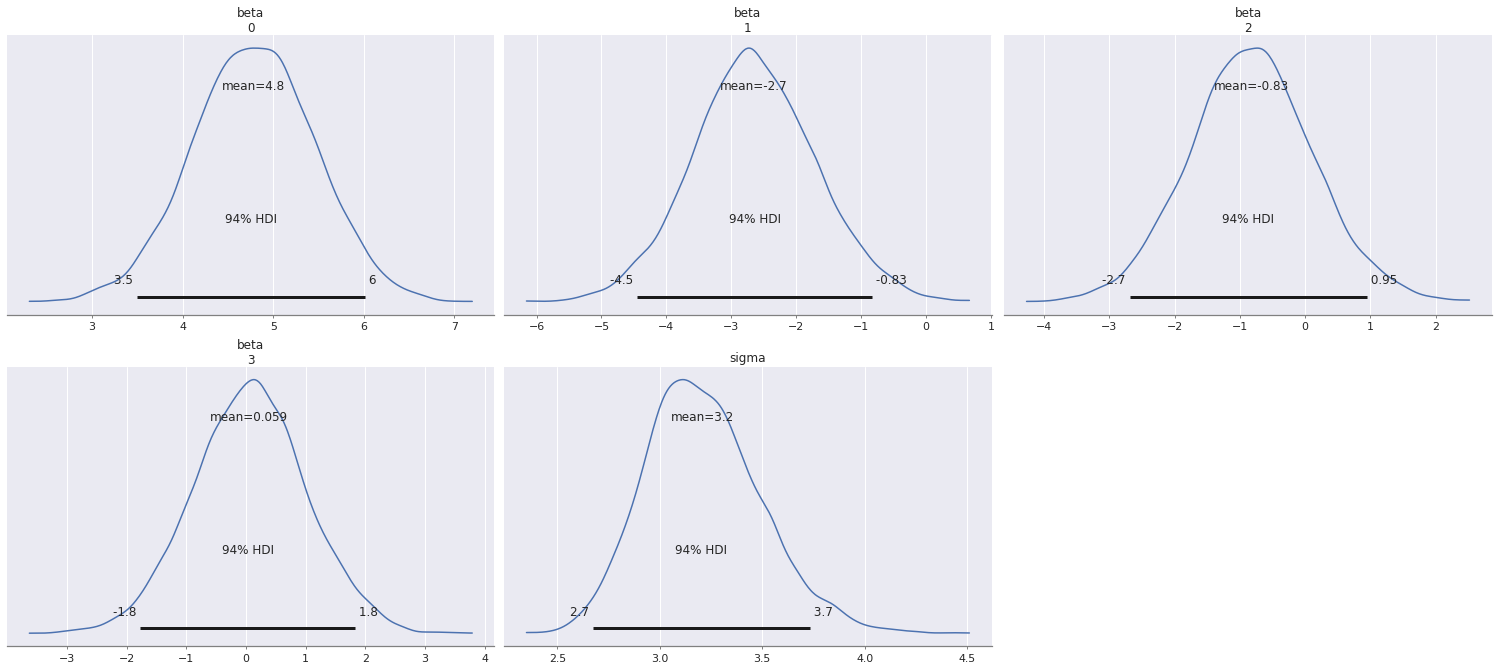

In [16]:
# Using the arviz package plot Using the arviz package 
# showing the defaults 94% Highest density interval.
az.plot_posterior(fit, var_names = ['beta', 'sigma']);

## Posterior autocorrelation plot

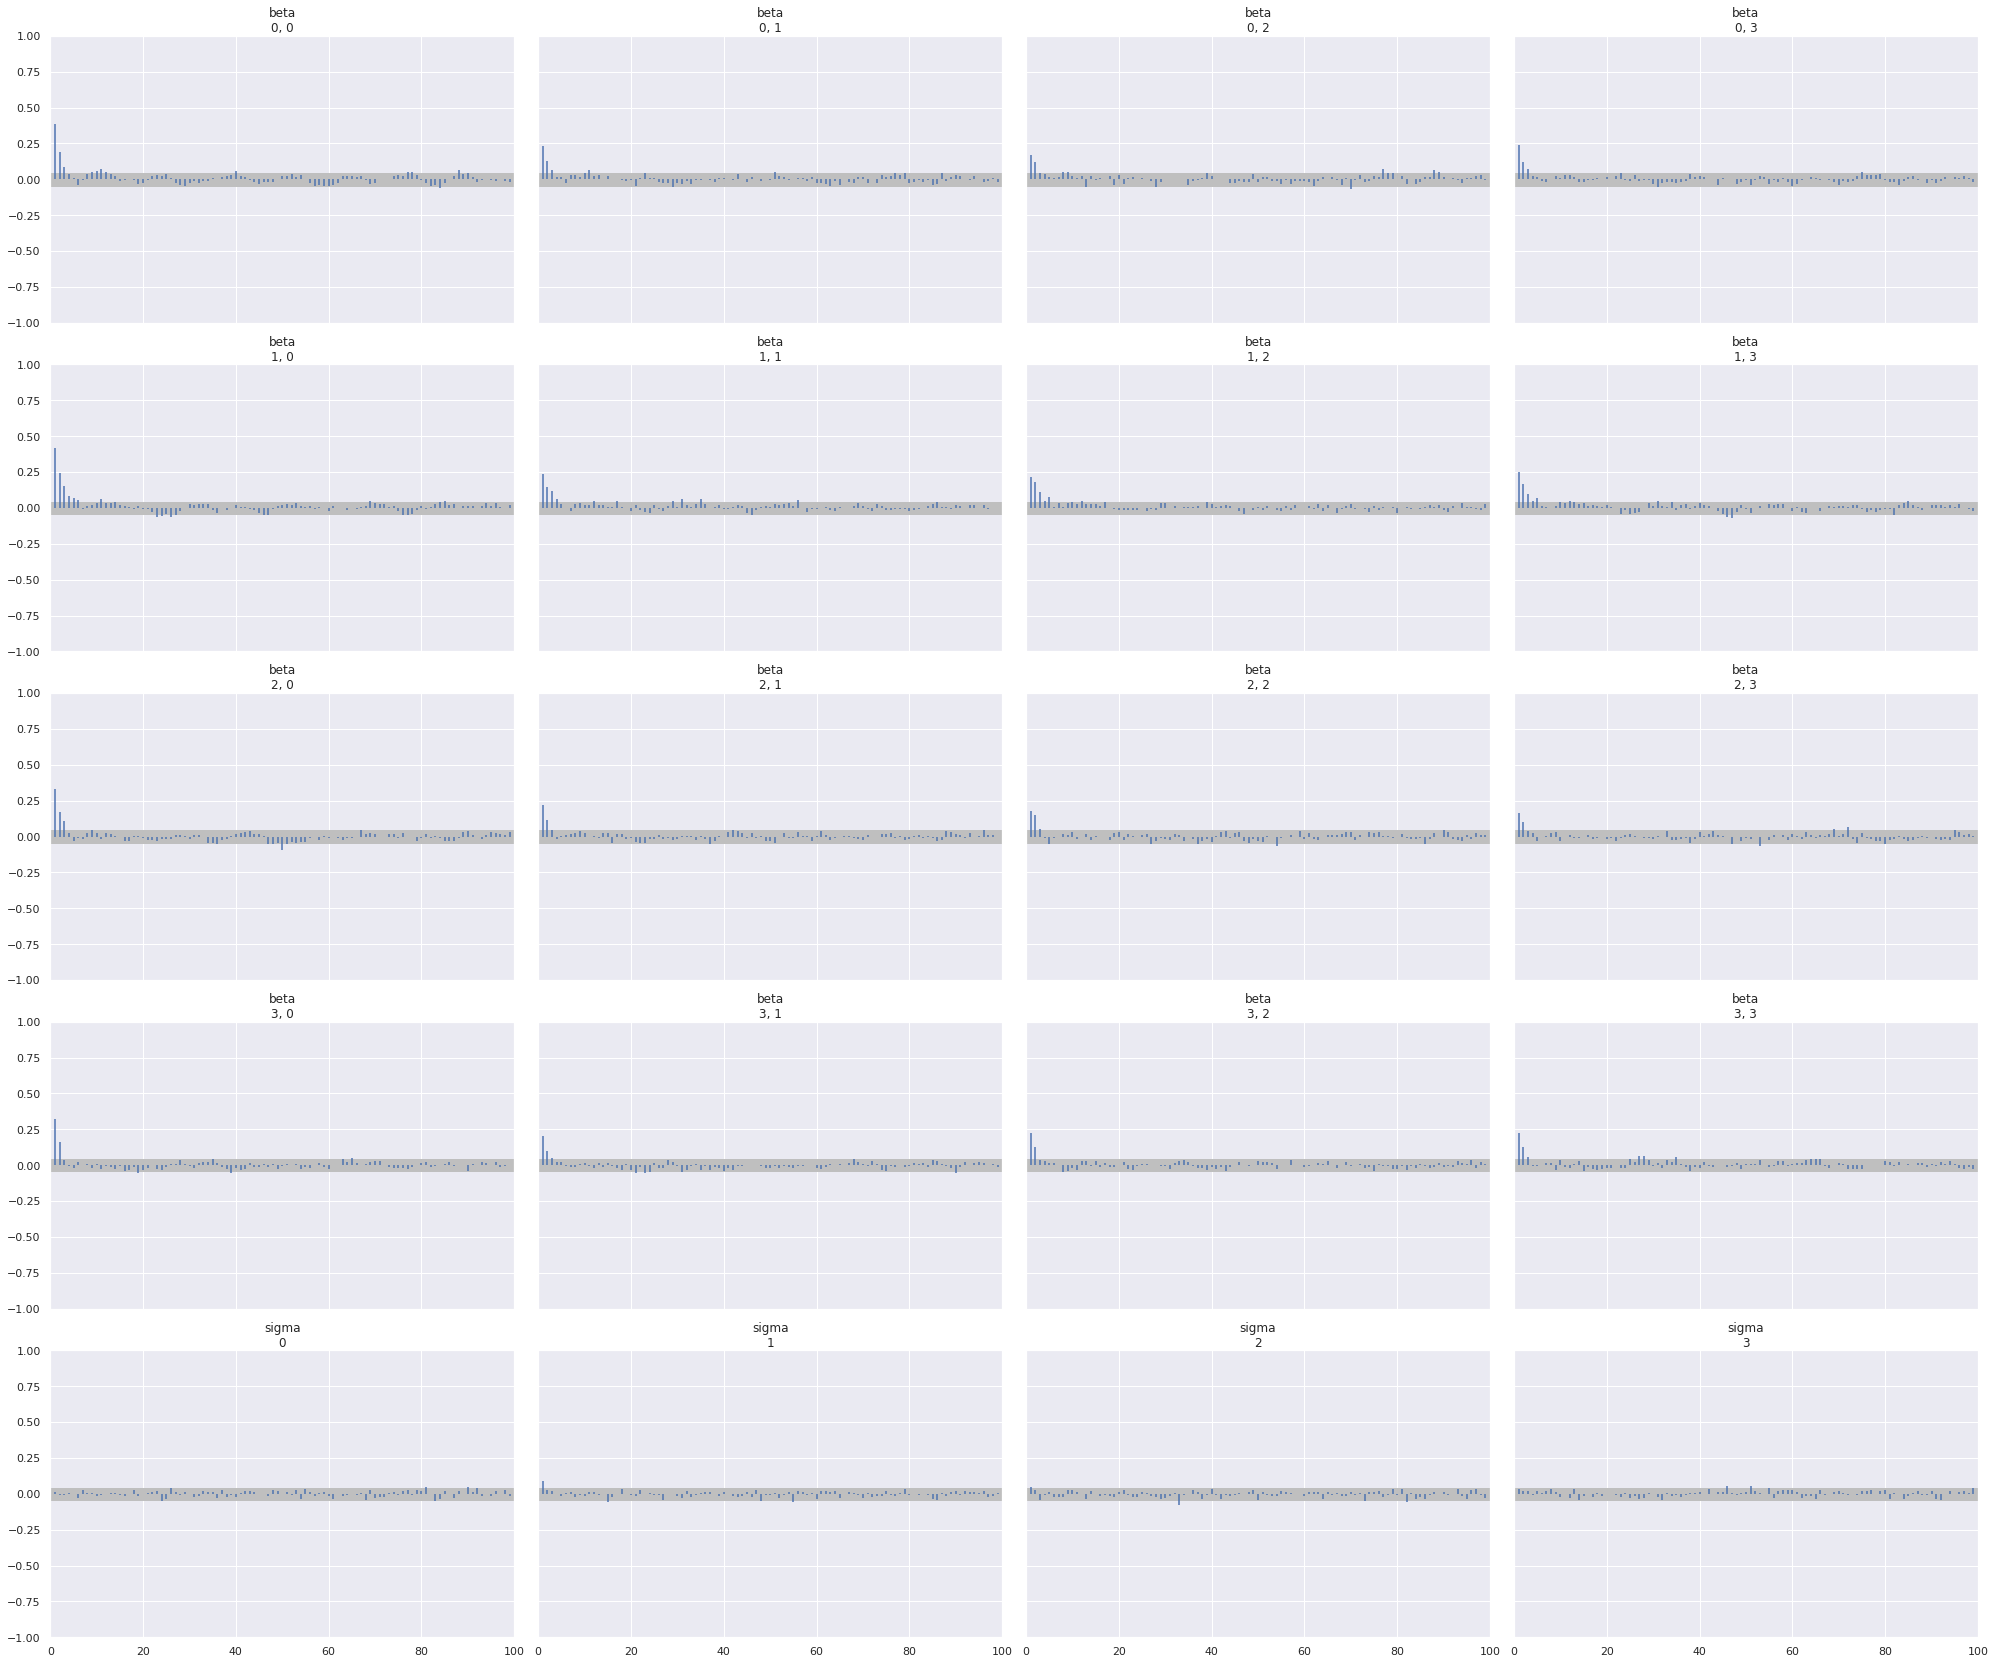

In [17]:
# Using the arviz package plot the autocorrelation of the 4 MCMC chains can be plotted.
az.plot_autocorr(fit, var_names=("beta", "sigma"));

The autocorrelation plots appear to be fine with the autocorrelation quickly dropping to 0.

## Posterior trace plots 

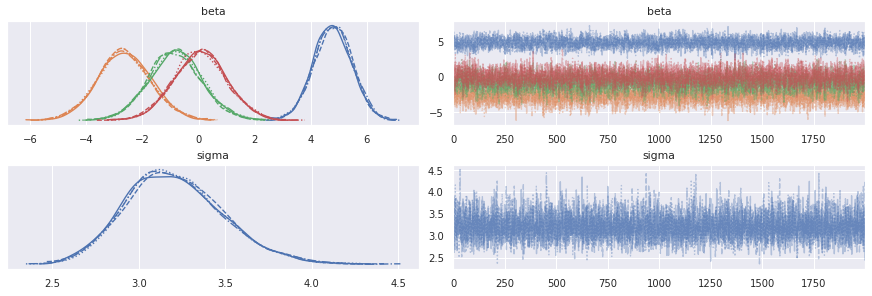

In [18]:
az.plot_trace(fit, var_names = ["beta", "sigma"]);

# Posterior predcitive check 

In [19]:
# Convert pystan fit object to IO for Arviz functions.
idata = az.from_pystan(posterior = fit, posterior_model = sm, 
                       posterior_predictive = ['yrep'], observed_data = 'y')

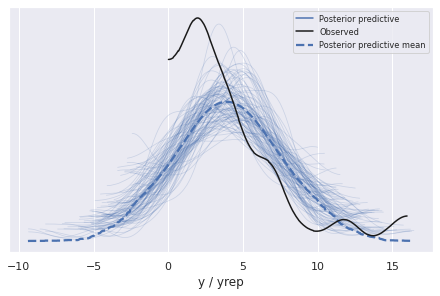

In [20]:
# Plot posterior simulated data sets for posterior predictive check
az.plot_ppc(idata, data_pairs = {"y" : "yrep"}, num_pp_samples = 100);

As the posterior predictive plot show above the model has a very poor fit to the data. The model Predicts impossible negative values (no such things as a negative intrusive thought), whilst not capturing the right skew of the observed data. Why is this though? The reason is the use of the normal likelihood which has the support from $-\infty, \infty$ and that the number of intrusive thoughts is count variable so is bounded to be positive. Overall, whilst showing a categorical regression here its utility in this particular data analysis is minimal. Fortunately, there are alternatives to this model that are shown in the poisson regression notebooks.  

# Reporting the results of the Bayesian categorical regression

<font size = "3">As Kruschke (2015) correctly points out there is not standard formula or presentation method for results in journal article like the APA guide for reporting frequentist analysis. It is likely there never will be, because as McElreath (2020) explains, Bayesian data analysis is more like a engineering approach to the problem and the resulting model that is fit will be analysis specific. In addition, as Gabry et al, (2019) argue visualisations maybe even more key. So, all the visualisations above would have to be included with any write up. Anyway, below the write up generally follows the advice of Kruschke (2015) chapter 25. In any application though it comes down to the problem to be described an the audience that needs to be convinced. </p><br/>

<h2>Write up of categorical regression</h2><br/>

Note having fitted the model and observed the ill fit it is likely that the following write would have little utility, given that the data is of counts and normal likelihood was inappropriate for this data analysis problem. Of course, throughout the scientific literature their are countless examples of inappropriate models applied to data, McElreath (2020). See, Liddell and Kruschke (2018) for arguably the most common example in the psychological sciences. Now, bearing that in mind, the following write up is still a useful example for a categorical regression write up.  

The data for the number of intrusive thoughts were analysed using the statistical model defined above which was categorical regression model with four parameters $\beta$ parameters. With the primary parameters being the contrast variables set inline with Schad, Vasishth, Hohenstein, & Kliegl (2020) setting up of models to focus on hypothesised differences. In this particular example treatment coding was used such that the intercept term $\beta_0$ represents the estimated mean of the the control condition where participants completed a filler task and all other $\beta$ parameters are the differences between the control condition and the relevant other experimental condition. As this was a Bayesian statistical model priors had to be assigned to all model parameters. Default reguralising priors were used as specified by Goodrich, Gabry,  Ali, & Brilleman (2018) for regression models. These defaults were used due to lack of any specific information for eliciting problem specific priors, but with appreciation for the issues of flat priors and reguralisation benefits of weakly informative priors (McElreath, 2020).

Four MCMC chains were ran each taking 2000 samples from the posterior. 1000 of the samples from each chain were used as warmup and discarded from the final analysis (i.e not used in the inferences). Convergence of the MCMC chains was examined through the use of autocorrelation and traceplots. Visual inspection suggested no issues in terms of autocorrelation or chain mixing and the generally accepted metric of r-hat < 1.05 and an effective sample size > 400 was achieved for all estimated parameters (see, Vehtari et al. for further discussion). The posteriors showed that the most credible values for the contrast of interest (differences between the control condition against the other experimental conditions) represented by $\beta_1$ = Control:Tetris & reactivation, $\beta_2$ = Control:Tetris, $\beta_3$ = Control:Reactivation parameters were: $\beta_1$ = $\mu$ = -2.67, with a 94% CrI [-4.45, -0.86], $\beta_2$  = $\mu$ = -0.81, with a 94% CrI [-2.54, 0.98] and $\beta_3$  = $\mu$ = 0.03, with a 97% CrI [-1.72, 1.78].

As the posterior summary show the only credible interval for a difference from the the control group that does not cross 0 was $\beta_1$. This is consistent with making a claim of statistical significance under the Bayesian framework (Kruschke, 2018; Makowski, Ben-Shachar, Chen, & Lüdecke, 2019). But, because a posterior is a measure of continous evidence, it is seemingly not incorrect to conclude that there is no difference between the Control:Reactivation $\beta_3$ as the interval nearly exactly overlaps 0 on either side by nearly the same value, Whereas, the $\beta_2$ is close to being statiscally significant such that upon a replication or the acquisition of more data to increase precision of the estimates that the same result may not hold. The resultss then support the hypothesis, but it also suggests the potentially need for further investigation/replication.

# References 

Bürkner, P. C. (2017). brms: An R package for Bayesian multilevel models using Stan. Journal of statistical software, 80(1), 1-28.

Goodrich, B., Gabry, J., Ali, I., & Brilleman, S. (2018). rstanarm: Bayesian applied regression modeling via Stan. R package version, 2(4), 1758.
    
Hays, W.L. (1973) Statistics for the social sciences. Winston New York: Holt, Rinehart.

Kruschke, J. K., (2015). Doing bayesian data analysis: A tutorial with R, JAGS, and Stan. New york, NY: Academic Press.

Kruschke, J. K. (2018). Rejecting or accepting parameter values in Bayesian estimation. Advances in Methods and Practices in Psychological Science, 1(2), 270-280.
    
James, E. L., Bonsall, M. B., Hoppitt, L., Tunbridge, E. M., Geddes, J. R., Milton, A. L., & Holmes, E. A. (2015). Computer game play reduces intrusive memories of experimental trauma via reconsolidation-update mechanisms. Psychological Science, 26, 1201-1215.

Liddell, T. M., & Kruschke, J. K. (2018). Analyzing ordinal data with metric models: What could possibly go wrong?. Journal of Experimental Social Psychology, 79, 328-348.

Makowski, D., Ben-Shachar, M. S., Chen, S. H., & Lüdecke, D. (2019). Indices of effect existence and significance in the Bayesian framework. Frontiers in psychology, 10, 2767.

McElreath, R. (2020). Statistical rethinking: A Bayesian course with examples in R and Stan. Boca Raton: CRC Press.

Schad, D. J., Vasishth, S., Hohenstein, S., & Kliegl, R. (2020). How to capitalize on a priori contrasts in linear (mixed) models: A tutorial. Journal of Memory and Language, 110, 104038.

Vehtari, A., Gelman, A., Simpson, D., Carpenter, B., & Bürkner, P. C. (2019). Rank-normalization, folding, and localization: An improved $\widehat {R} $ for assessing convergence of MCMC. arXiv preprint arXiv:1903.08008.

Westfall, J. (2017). Statistical details of the default priors in the Bambi library. arXiv preprint arXiv:1702.01201.